In [9]:
# Install LangGraph and langchain packages
!pip install --quiet -U langgraph langchain_openai langchain_core

In [1]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

In [2]:
_set_env("OPENAI_API_KEY")

In [3]:
# from langchain_openai import ChatOpenAI
# llm = ChatOpenAI(model='gpt-4o')

from langchain_community.chat_models import ChatOllama

# Connect to local Ollama server running DeepSeek
llm = ChatOllama(
    model="deepseek",  # Must match your Ollama model name
    base_url="http://localhost:11434",  # Default Ollama URL
    temperature=0.7,    # Optional: Adjust creativity (0-1)
    # num_ctx=4096,     # Uncomment to match your context window
    # num_gpu=20       # Uncomment if you configured GPU layers
)

/tmp/ipykernel_33426/1536273511.py:7: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(


In [4]:
# define llm Node
def call_llm(message):
    return llm.invoke(message)

In [5]:
from langgraph.graph import Graph, START, END

# Create a new Graph
workflow = Graph()
# Add the nodes
workflow.add_node("call_llm", call_llm)

# Add the Edges
workflow.add_edge(START, "call_llm")
workflow.add_edge("call_llm", END)

#Compile the workflow
app = workflow.compile()

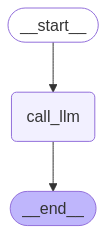

In [6]:
# Visualize your graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
response = app.invoke("hello")
print(response.content)

Hello! How can I assist you with your programming or computer science-related queries today? If you have any questions, feel free to ask.



In [8]:
response = llm.invoke("Give me hello world python code")
print(response.content)

Sure, here is a simple Python program that prints "Hello World":

```python
print("Hello World")
``` 
When you run this script in your terminal or command prompt it will display the message 'Hello World'. If running on Jupyter notebook add `%%script echo -e "\n"` before print statement. This is to avoid having an extra newline after each cell execution when using %run magic function, as output from python cells usually comes with a trailing new line by default in jupyter notebooks

```python
%script echo -e "\n"  # avoids adding additional \n at end of Jupyter notebook print statements.
print("Hello World")   # prints Hello world without newline after each cell execution on running %run magic command within the same note book session .    
```    This will be effective only for python cells and not applicable in other languages or outside jupyter notebooks environment  as it is specific to Jupyter notebook's Python kernel. Note also that this doesn’t affect print statements executed di

In [10]:
print("Hello World")

Hello World
